## Support Vector Regression

SVR aims to find a hyperplane that best represents the relationship between input features and continuous output values. 

It does this by minimizing the error while allowing for a specified margin of tolerance around the regression line, defined by an ε-insensitive tube. 

SVR uses a kernel function to map data into a higher-dimensional space, and it includes a regularization parameter (C) to control the trade-off between fitting the training data closely and achieving a smooth regression function. 

SVR is particularly useful for handling nonlinear relationships and datasets with outliers.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [11]:
dataset = pd.read_csv('./position_salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [14]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [16]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

SVR can use both linear and non-linear kernels. 

A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. 

The choice of kernel depends on the data’s characteristics and the task’s complexity.



In [18]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/rsrivastava/Desktop/github/mlaz/mlenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [20]:
transformed_prediction = regressor.predict(sc_X.transform([[6.5]]))

prediction = sc_y.inverse_transform(transformed_prediction.reshape(-1, 1))

### Visualizing the SVR results

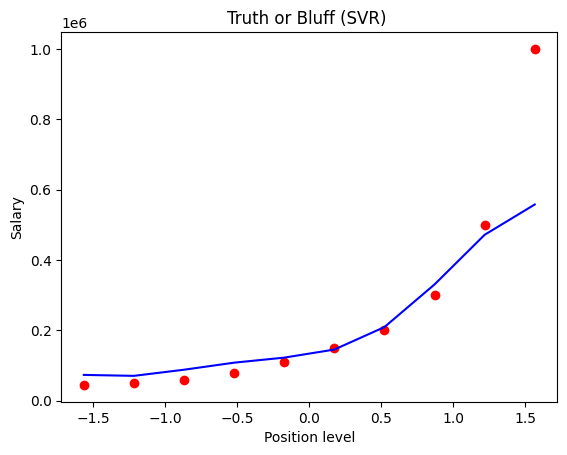

In [21]:
inv_X = sc_X.inverse_transform(X)
inv_y = sc_y.inverse_transform(y)

plt.scatter(inv_X, inv_y, color='red')
plt.plot(inv_X, sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR) ')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()